**This file is to show the solution to SSC loss is equivalent to SIM in absence of noise**\
\
\
The SSC loss:
$$\min \|X-WX\|_F + \lambda\|W\|_*$$
\
\
The SIM:
$$W=VV^T$$
or equivalently 
$$\min \|W\|_*, \quad s.t. X=WX$$
\
\
Thus, it's expected when $\lambda$ is small, the optimal $W$ for SSC loss is close to SIM

In [1]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
from util import *
from loss import *
from Estimator import *
from cluster import *
import matplotlib.pyplot as plt
from numpy.linalg import svd

## Explore the behavior on clean data

In [7]:
group_label = [0]*10 + [1]*10 + [2]*10
U, latent_features, node_features = sub_noisy_feature_generator(group_label, num_features=20, num_latent_features=8, std=0, orthogonal=False)

<AxesSubplot:>

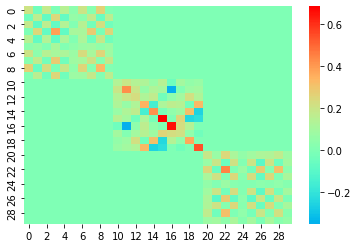

In [8]:
V = svd(node_features.T)[2]
V_ski = V[:8,:]
sb.heatmap(V_ski.T@V_ski, cmap='rainbow', center=0)

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


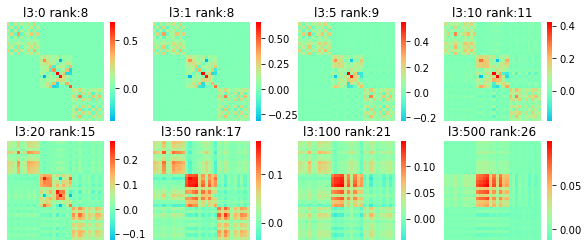

In [9]:
l3s = np.float32([0.1,1,5,10,20,50,100,500])
num3 = len(l3s)
num = num3
flag = 1
f = plt.figure(figsize=(10,4))
for i in range(num3):
    ax0 = f.add_subplot(np.int0(np.ceil(num/4)), 4, flag)
    lr = LR_Estimator(l3=l3s[i], method='cp', solver='SCS')
    lr.fit(node_features, maxiter=500)
    lr.heatplot(xticklabels=False, yticklabels=False, cbar=True)
    ax0.set_title('l3:'+str(int(np.round(l3s[i])))+' rank:'+str(np.linalg.matrix_rank(lr.W.value)))
    flag = flag+1
del l3s

### Explore the behavior of clean graph

### Build complete clean graph

In [15]:
G = nx.Graph()
subgraph = nx.complete_graph(10)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.complete_graph(10)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.complete_graph(10)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
L, D, Gamma = graph_to_mat(G)

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


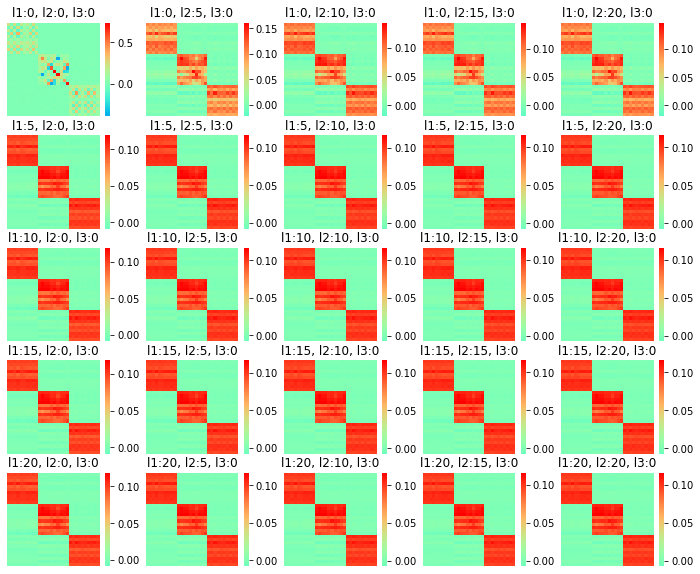

In [28]:
l1s = np.float32([0,5,10,15,20])
l2s = np.float32([0,5,10,15,20])
l3s = np.float32([0.1])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,10))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/5)), 5, flag)
            ase = as_El_Estimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
            ase.fit(node_features, maxiter=100)
            ase.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s
del ase

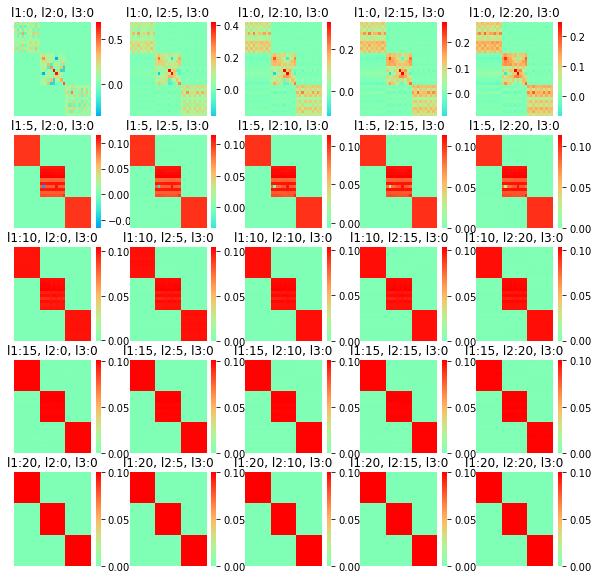

In [29]:
l1s = np.float32([0,5,10,15,20])
l2s = np.float32([0,5,10,15,20])
l3s = np.float32([0.1])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(10,10))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/5)), 5, flag)
            ase = as_El_Estimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
            ase.fit(node_features, maxiter=1000)
            ase.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s
del ase

#### Build clean star graph

In [36]:
G = nx.Graph()
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
L, D, Gamma = graph_to_mat(G)

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


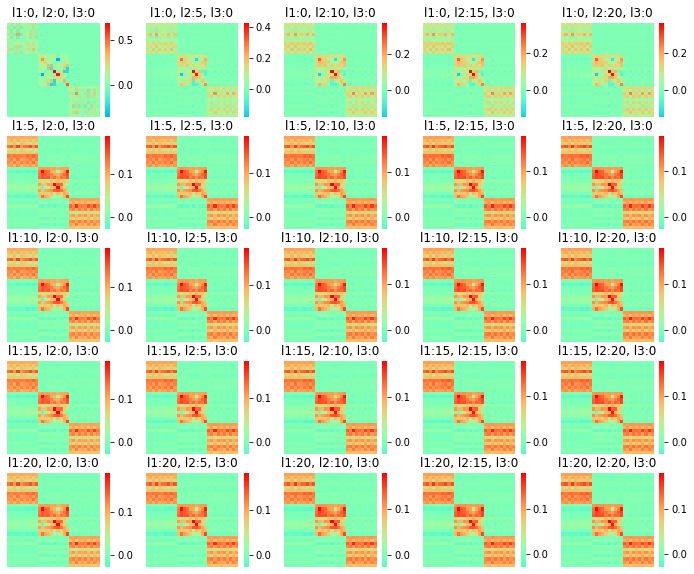

In [37]:
l1s = np.float32([0,5,10,15,20])
l2s = np.float32([0,5,10,15,20])
l3s = np.float32([0.1])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(12,10))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/5)), 5, flag)
            ase = as_El_Estimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
            ase.fit(node_features, maxiter=100)
            ase.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s
del ase

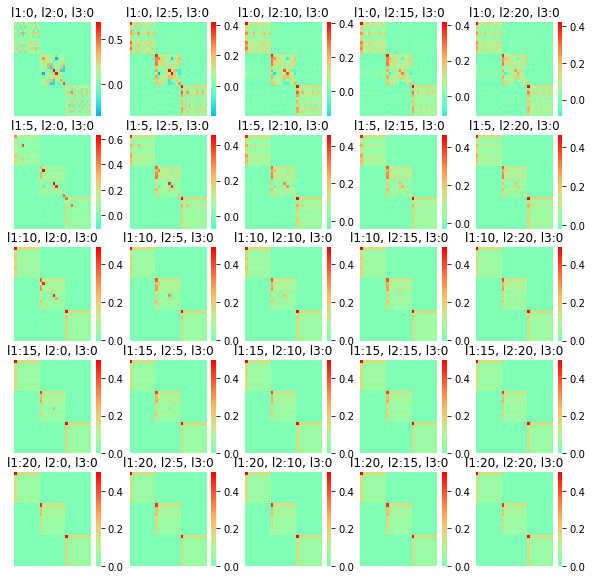

In [38]:
l1s = np.float32([0,5,10,15,20])
l2s = np.float32([0,5,10,15,20])
l3s = np.float32([0.1])
num1 = len(l1s)
num2 = len(l2s)
num3 = len(l3s)
num = num1 * num2 * num3
flag = 1
f = plt.figure(figsize=(10,10))
for i in range(num1):
    for j in range(num2):
        for k in range(num3):
            ax0 = f.add_subplot(np.int0(np.ceil(num/5)), 5, flag)
            ase = as_El_Estimator(l1=l1s[i], l2=l2s[j], l3=l3s[k], Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
            ase.fit(node_features, maxiter=1000)
            ase.heatplot(xticklabels=False, yticklabels=False, cbar=True)
            ax0.set_title('l1:'+str(int(l1s[i]))+', '+'l2:'+str(int(l2s[j]))+', '+'l3:'+str(int(np.round(l3s[k]))))
            flag = flag+1
del l1s
del l2s
del l3s
del ase